In [11]:
import torch
from torch import nn, optim
import torch.nn.functional as F
import torchvision.transforms.functional as TF
from torch.utils.data import DataLoader, default_collate
from datasets import load_dataset
import matplotlib.pyplot as plt

In [ ]:
name = 'fashion_mnist'
x,y = 'image','label'
dsr = load_dataset(name)

In [7]:
def transform(b):
    b[x] = [TF.to_tensor(ele) for ele in b[x]]
    return b

def collate_fn(b):
    clt = default_collate(b)
    return (clt[x], clt[y])

class DataLoaders:
    def __init__(self, train_ds, val_ds, bs, collate_fn):
        self.train = DataLoader(train_ds, batch_size=bs, shuffle=True, collate_fn=collate_fn)
        self.valid = DataLoader(train_ds, batch_size=bs*2, shuffle=False, collate_fn=collate_fn)

In [8]:
bs = 1024
dst = dsr.with_transform(transform)
dls = DataLoaders(dst['train'], dst['test'], bs=bs, collate_fn=collate_fn)

In [10]:
xb,yb = next(iter(dls.train))
xb.shape,yb.shape,xb.min(),xb.max()

(torch.Size([1024, 1, 28, 28]), torch.Size([1024]), tensor(0.), tensor(1.))

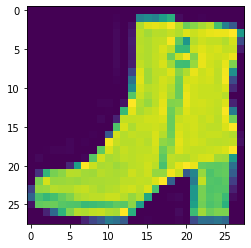

In [13]:
plt.imshow(xb[0].permute(1,2,0));

In [19]:
betamin,betamax,n_steps = 0.0001,0.02,1000
beta = torch.linspace(betamin, betamax, n_steps)
sigma = beta.sqrt()
alpha = 1.-beta
alphabar = alpha.cumprod(dim=0)

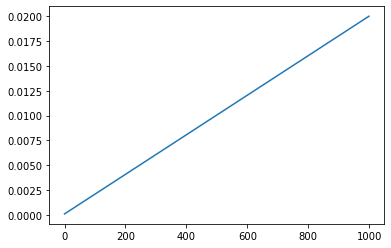

In [16]:
plt.plot(beta);

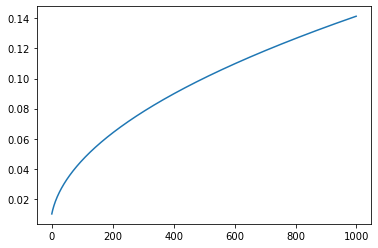

In [20]:
plt.plot(sigma);

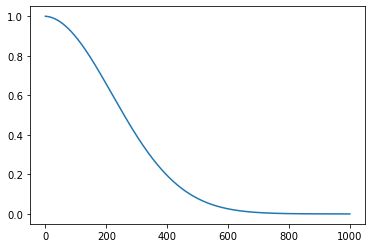

In [21]:
plt.plot(alphabar);

In [70]:
def noisify(x0, alphabar):
    device = x0.device
    n = len(x0)
    t = torch.randint(0, n_steps, (n,), dtype=torch.long)
    eps = torch.randn(x0.shape, device=device)
    alphabar_t = alphabar[t].reshape(-1, 1, 1, 1).to(device)
    xt = alphabar_t.sqrt()*x0 + (1-alphabar_t).sqrt()*eps
    return (xt, t.to(device)), eps

In [71]:
(xt, t), eps = noisify(xb[:25], alphabar)

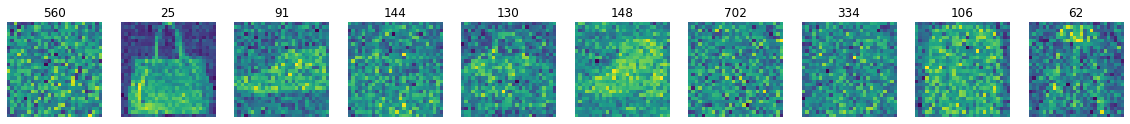

In [74]:
sz = 10
_,axs = plt.subplots(1, 10, figsize=(20, 5))
for im,ax,title in zip(xt[:sz], axs.flat, t[:sz]):
    ax.imshow(im.permute(1,2,0))
    ax.set_title(title.item())
    ax.set_axis_off()